In [28]:
from scipy.sparse import dok_matrix
import networkx as nx
import numpy as np
import mesa
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
%load_ext autoreload
%autoreload 2

from trans_infra.trans_infra.model import TransInfraNetworkModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
import yaml
with open('highway.yaml') as f:
    highway = yaml.safe_load(f)

for k, v in highway.items():
    if v['general'] == 'car':
        v['speed'] = 48300          # 30 miles ph in meters ph
    elif v['general'] == 'pedbike':
        v['speed'] = 16100          # 10 miles ph
    elif v['general'] == 'bus':
        v['speed'] = 32200          # 20 miles ph
    else:
        v['speed'] = 16100          # idk

with open('highway.yaml', 'w') as f:
    yaml.dump(highway, f)

In [23]:
model = TransInfraNetworkModel(500, "./osm_data/east.osm")

In [35]:
for _ in range(24):
    model.step()

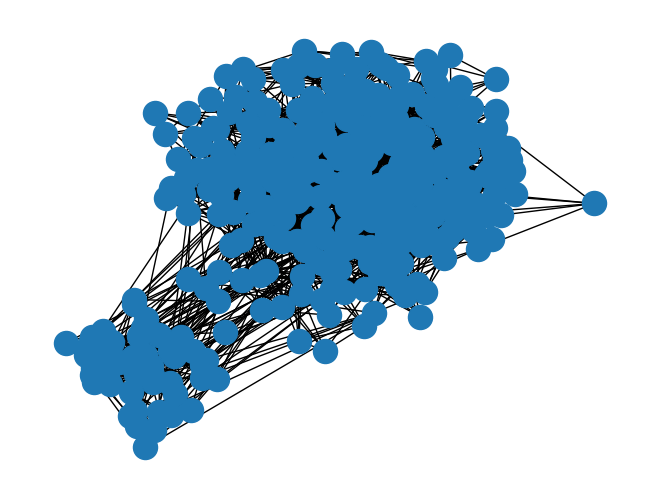

6

In [36]:
social_graph = nx.from_scipy_sparse_array(model.A_social)
# nx.node_connectivity(social_graph)
k_core = nx.k_core(social_graph)
pos = nx.spring_layout(k_core, seed=225)  # Seed for reproducible layout
nx.draw(k_core, pos)
plt.show()
nx.node_connectivity(k_core)

In [37]:
model.nodes

NodeDataView({2: {'building': 'street', 'general': 'street', 'color': 'gray', 'x': 688169.4497782105, 'y': 3986815.5444872607, 'agent': []}, 3: {'building': 'street', 'general': 'street', 'color': 'gray', 'x': 688165.103413244, 'y': 3986758.8582120207, 'agent': []}, 4: {'building': 'street', 'general': 'street', 'color': 'gray', 'x': 688162.1486630832, 'y': 3986846.8643766735, 'agent': []}, 6: {'building': 'street', 'general': 'street', 'color': 'gray', 'x': 688257.5972507185, 'y': 3986818.2157254093, 'agent': []}, 130: {'building': 'street', 'general': 'street', 'color': 'gray', 'x': 688172.3914169612, 'y': 3986838.521129281, 'agent': []}, 561: {'building': 'street', 'general': 'street', 'color': 'gray', 'x': 688209.8327336583, 'y': 3986810.377840208, 'agent': []}, 117: {'building': 'street', 'general': 'street', 'color': 'gray', 'x': 688172.1820424872, 'y': 3986799.9036880643, 'agent': []}, 5: {'building': 'street', 'general': 'street', 'color': 'gray', 'x': 688161.2421636934, 'y': 3

In [39]:
model.G_trans.edges(data=True)

MultiEdgeDataView([(2, 3, {'osmid': 16534420, 'highway': 'tertiary', 'general': 'car', 'color': 'red', 'length': 68.56489926616828, 'speed': 48300.0, 'geometry': <LINESTRING (688165.103 3986758.858, 688160.366 3986758.807, 688162.467 3986...>}), (2, 4, {'osmid': 16534420, 'highway': 'tertiary', 'general': 'car', 'color': 'red', 'length': 38.24095542965968, 'speed': 48300.0, 'geometry': <LINESTRING (688162.149 3986846.864, 688162.353 3986841.969, 688162.467 3986...>}), (2, 6, {'osmid': 353827088, 'highway': 'residential', 'general': 'pedbike', 'color': 'green', 'length': 88.27109067426224, 'speed': 16100.0, 'geometry': <LINESTRING (688257.597 3986818.216, 688250.425 3986816.975, 688172.455 3986...>}), (2, 130, {'osmid': 675868799, 'highway': 'footway', 'general': 'pedbike', 'color': 'green', 'length': 23.80769744155347, 'speed': 16100.0, 'geometry': <LINESTRING (688172.391 3986838.521, 688172.519 3986820.799, 688169.45 39868...>}), (2, 561, {'osmid': 675868738, 'highway': 'footway', 'ge

10.6 sec for 8 iter @ 24 steps & 500 agents
21 sec for 16 iter @ 24 steps & 500 agents

33.3 sec for 8 iter @ 24 steps & 1000 agents
65.8 sec for 16 iter @ 24 steps & 1000 agents

10 cores on cpu
32 cores on gpu

In [17]:
parameters = {"num_agents": 500, 
              "graph_file": "./osm_data/east.osm"}

mesa.batch_run(
    TransInfraNetworkModel,
    parameters,
    max_steps=24,
    iterations=100,
    number_processes=None
)

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [395]:
social_graph = nx.from_scipy_sparse_array(model.A_social)

In [394]:
social_graph = nx.from_scipy_sparse_array(model.A_social)
approx_k_components = nx.approximation.k_components(social_graph)

KeyboardInterrupt: 

per agent steps
1. init
    - precompute home, work, & commute
2. assess what the most needed resource is
    scale_dist_cost = (np.array(dist_cost) / max(dist_cost)) * 8
    urgency = self.model.threshes / (self.curr_resources + scale_dist_cost + 1)

    - computed by threshes / (curr_reses / scaled dists)

### Time
- 1 unit = 30 min
    - 16 sleep, 16 work, 16 social? (or make more)
- change thresh logic to work with time
- reset resources every  ...

### Precompute
- save and load model after precompute for faster init

### Social
- connectivity measure

### Overall
- add traffic
- only search when needed / cut down run time
- *** ^^^ ***

## Split sim into days of 24 timesteps, each representing 60 min
sleep target -> 8 
work target -> 8
social target -> 8

In [ ]:
b_types = {}
for n in model.nodes:
    if n[1]['general'] in b_types:
        b_types[n[1]['general']] = b_types[n[1]['general']] + 1
    else: 
        b_types[n[1]['general']] = 1
b_types

{'street': 651, 'work': 13, 'sleep': 21, 'yes': 446, 'other': 15, 'social': 2}